In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## Define the function for which we'd like to find the roots

In [11]:
def function_for_roots(x):
	a = 1.01
	b = -3.04
	c = 2.07
	return a*x**2 + b*x + c #get the roots of ax^2 + bx + c

### We need a function to check whether our initial values are valid

In [12]:
def check_initial_values(f, x_min, x_max, tol):

	#check our intital guesses
	y_min = f(x_min)
	y_max = f(x_max)
	
	#check that x_min and x_max contain a zero crossing
	if(y_min*y_max>=0.0):
		print("No zero crossing found in the range = ",x_min,x_max)
		s = "f(%f) = %f, f(%f) = %f" % (x_min,y_min,x_max,y_max)
		print(s)
		return 0
		
	#if x_min is a root, then return flag == 1
	if(np.fabs(y_min)<tol):
		return 1
		
	#if x_max is a root, then return flag == 2
	if(np.fabs(y_max)<tol):
		return 2
		
	#if we reacth this point, the bracket is valid
	#and we will return 3
	return 3

### Now we will define the main work function that actually performs the iterate search

In [13]:
def bisection_root_finding(f, x_min_start, x_max_start, tol):

	#this function uses bisection search to find a root
	
	x_min = x_min_start		#minimum x in bracket
	x_max = x_max_start		#maximum x in bracket
	x_mid = 0.0				#mid point
	
	y_min = f(x_min)		#function value at x_min
	y_max = f(x_max)		#function value at x_max
	y_mid = 0.0				#function value at midpoint
	
	imax = 10000			#set a max number of iterations (10k)
	i = 0					#iteration counter
	
	#check the initial value
	flag = check_initial_values(f,x_min,x_max,tol)
	if(flag==0):
		print("Error in bisection_root_finding().")
		raise ValueError('Initial values invalid',x_min,x_max)
	elif(flag==1):
		#lucky guess
		return x_min
	elif(flag==2):
		#another lucky guess
		return x_max
		
	#if we reach here, then we need to conduct the search
	
	#set a flag
	flag = 1
	
	#enter a while loop
	while(flag):
		x_mid = 0.5*(x_min+x_max)	#mid point
		y_mid = f(x_mid)			#function value at x_mid				

		#check if x_mid is a root
		if(np.fabs(y_mid)<tol):
			flag = 0
		else:
			#x_mid is not a root
			
			#if the product of the function at the midpoint
			#and at one of the end points is greater than
			#zero, replace this end point
			if(f(x_min)*f(x_mid)>0):
				#replace x_min with x_mid
				x_min = x_mid
			else:
				#replace x_max with x_mid
				x_max = x_mid
				
				
			#print out the iteration
			print(x_min,f(x_min),x_max,f(x_max))
			
			#count the iteration
			i += 1
			
			#if we have exceeded the max number of iteration, exit
			if(i>=imax):
				print("Exceeded max number of iterations = ",i)
				s = "Min bracket f(%f) = %f" % (x_min,f(x_min))
				print(s)
				s = "Max bracket f(%f) = %f" % (x_max,f(x_max))
				print(s)
				s = "Mid bracket f(%f) = %f" % (x_mid,f(x_mid))
				print(s)
				raise StopIteration('Stopping iterations after ',i)
				
	#we are done!
	return x_mid

### Perform the Search

In [14]:
x_min = 0.0
x_max = 1.5
tolerance = 1.0e-6

#print the initial guess
print(x_min,function_for_roots(x_min))
print(x_max,function_for_roots(x_max))

x_root = bisection_root_finding(function_for_roots,x_min,x_max,tolerance)
y_root = function_for_roots(x_root)

s = "Root found with y(%f) = %f" % (x_root,y_root)
print(s)

0.0 2.07
1.5 -0.2175000000000007
0.75 0.3581249999999996 1.5 -0.2175000000000007
0.75 0.3581249999999996 1.125 -0.07171875000000005
0.9375 0.10769531249999975 1.125 -0.07171875000000005
1.03125 0.009111328124999485 1.125 -0.07171875000000005
1.03125 0.009111328124999485 1.078125 -0.033522949218749876
1.03125 0.009111328124999485 1.0546875 -0.012760620117187482
1.03125 0.009111328124999485 1.04296875 -0.0019633483886720704
1.037109375 0.0035393142700193003 1.04296875 -0.0019633483886720704
1.0400390625 0.0007793140411376243 1.04296875 -0.0019633483886720704
1.0400390625 0.0007793140411376243 1.04150390625 -0.0005941843986509987
1.040771484375 9.202301502186927e-05 1.04150390625 -0.0005941843986509987
1.040771484375 9.202301502186927e-05 1.0411376953125 -0.0002512161433698701
1.040771484375 9.202301502186927e-05 1.04095458984375 -7.963042706249368e-05
1.040863037109375 6.1878282573424315e-06 1.04095458984375 -7.963042706249368e-05
1.040863037109375 6.1878282573424315e-06 1.04090881347656

## Took 19 itterations to find roots

# Plotting the graph

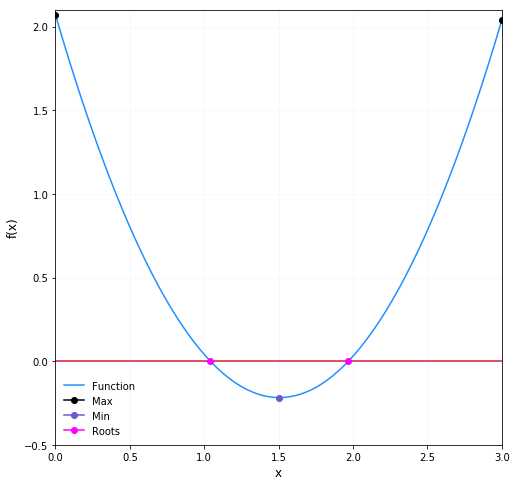

In [26]:
plt.figure(figsize = (8,8)) #size of graph
x = np.linspace(0,3,1000)
x_min_b = 1.5
x_max_b =3.0
x_root_b = 1.969030

z= 0*x
plt.plot(x,function_for_roots(x),color='dodgerblue',label='Function')
plt.plot(x,z,color='crimson')

#Plot max val
plt.plot(x_min,function_for_roots(x_min),color='k',marker='o',label='Max')
plt.plot(x_max_b,function_for_roots(x_max_b),color='k',marker='o')


#Plot main point
plt.plot(x_max,function_for_roots(x_max),color='slateblue',marker='o',label='Min')

#Plots of left/right roots
plt.plot(x_root,y_root,color='fuchsia',marker='o', label='Roots')
plt.plot(x_root_b,y_root,color='fuchsia',marker='o')

plt.xlabel('x',fontsize=12)
plt.ylabel('f(x)',fontsize=12)
plt.grid(color='aliceblue')
plt.xlim(0,3) #setting x, y limits
plt.ylim(-0.5,2.1)
plt.legend(frameon=False,fontsize = 'medium') #defining legend without frame and medium font
plt.show() 